<a href="https://colab.research.google.com/github/spingtseng/Basic-Machine-Learning/blob/main/DL01_MLP_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
# (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
# 檢視結構，shape函數：查看結構的維度(可以把多維陣列的形狀編譯出來)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

0:Black
255:White

In [ ]:
# 顯示數字圖片
# https://matplotlib.org/stable/tutorials/colors/colormaps.html ColorMap
# reverse:_r 顏色反過來
import matplotlib.pyplot as plt
# imshow 把數據轉成圖像
# plt.imshow(x_train[0], cmap="PiYG_r") # 反向
# plt.imshow(x_train[0], cmap="gray"
plt.imshow(x_train[0], cmap = "PuBu")

In [ ]:
import pandas as pd
pd.DataFrame(x_train[0])

###**激活函數**
####**中間層激活**<br>
<u>relu</u><br>
中間層一律用relu<br><br>
####**輸出層激活**<br>
<u>sigmoid</u><br>
如果最後一層只有一個輸出神經<br>
$sigmoid = \frac{1}{1+e^{-x}}$<br><br>
<u>softmax</u><br>
如果最後一層有兩個以上輸出神經<br>
$softmax_a = \frac{e^a}{e^a+e^b+e^c}$
$softmax_b = \frac{e^b}{e^a+e^b+e^c}$
$softmax_c = \frac{e^c}{e^a+e^b+e^c}$
<br>最大要點：要讓所有神經元加起來等於1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# unit 這一層要有幾個神經元(必須設定) activation：激活函式(中間層必選relu，避免梯度消失)
layers = [
      # 中間層 relu Parameters 參數 param 權重 784 * 128 + 128(bias)
      Dense(128, activation = "relu", input_dim=784),
      # 最後一層 需要10根神經元(0-9)，所以使用softmax 128 * 10 + 10(bias)
      Dense(10, activation = "softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 一個神經元(兩個機率): BinaryCrossEntropy
# 多個神經元: pilog(1/qi): CategoricalCrossEntropy
# cross-entropy 用來量測我們的預測和真實之間的差距
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       metrics=["accuracy"],
       optimizer="adam")

In [ ]:
# 將類向量（整數）轉換為二進制類矩陣
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0])
print(y_train_cat[0])

In [ ]:
# -1 電腦幫忙計算
x_train_shape = x_train.reshape(-1, 784) /255.0
x_test_shape = x_test.reshape(-1, 784) / 255.0
# print(x_train_shape[0])

In [ ]:
# batch_size 先看全部的梯度再平均，不要一次一次調。(20-200) 看圖片大小，圖片大->小一點，圖片小->大一點
# EarlyStopping: monitor 參考某個值結束 patience 只要沒有變好就停下來的次數 0:預設  restore_best_weights 如果變好則恢復
# 54000/200=270 總共調整270次
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
      EarlyStopping(patience = 5, restore_best_weights=True)      
]
model.fit(x_train_shape,
     y_train_cat,
     batch_size = 200,
     epochs = 50, #epochs 訓練次數 
     verbose = 2, #verbose 進度條 0(不輸出訓練log) 1(只輸出進度條) 2(每一個epoch 輸出訓練信息)，
     validation_split = 0.1,
     callbacks = callbacks)

In [ ]:
# model.evaluate: 在測試模式，返回誤差值和評估標準值
model.evaluate(x_test_shape, y_test_cat)

In [ ]:
from sklearn.metrics import confusion_matrix
# sklearn: predict_proba/predict
# tensorflow: predict/ predict_classes
# model.predict(x_test_shape) 預測所有機率 model.predict_classes(x_test_shape)預測答案，找出最高機率 
pre = model.predict_classes(x_test_shape)
# confusion_matrix 混淆矩陣 第一個參數：正確答案 第二個參數：預測答案
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       columns=[str(i) + "(預測)" for i in range(10)],
       index=[str(i) + "(正確)" for i in range(10)])

###**subplot**<br>
把多個圖結合成一張圖<br>
plt.subplot(總高度,總寬度，第幾張)<br>
要注意第一個是從1開始算<br><br>
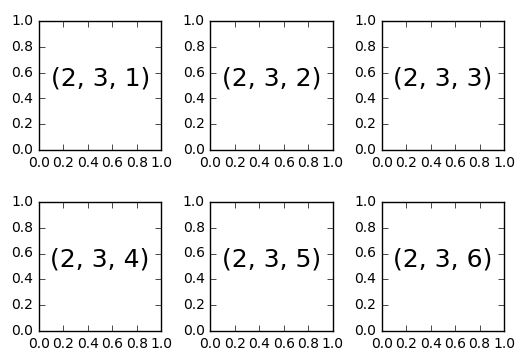



In [ ]:
# # np.npzero用法
# # 先看row, 再看column
# mat_sample = [[1, 0, 0],
#         [0, 2, 0],
#         [1, 0, 0],
#         [0, 3, 5]]
# np.nonzero(mat_sample)

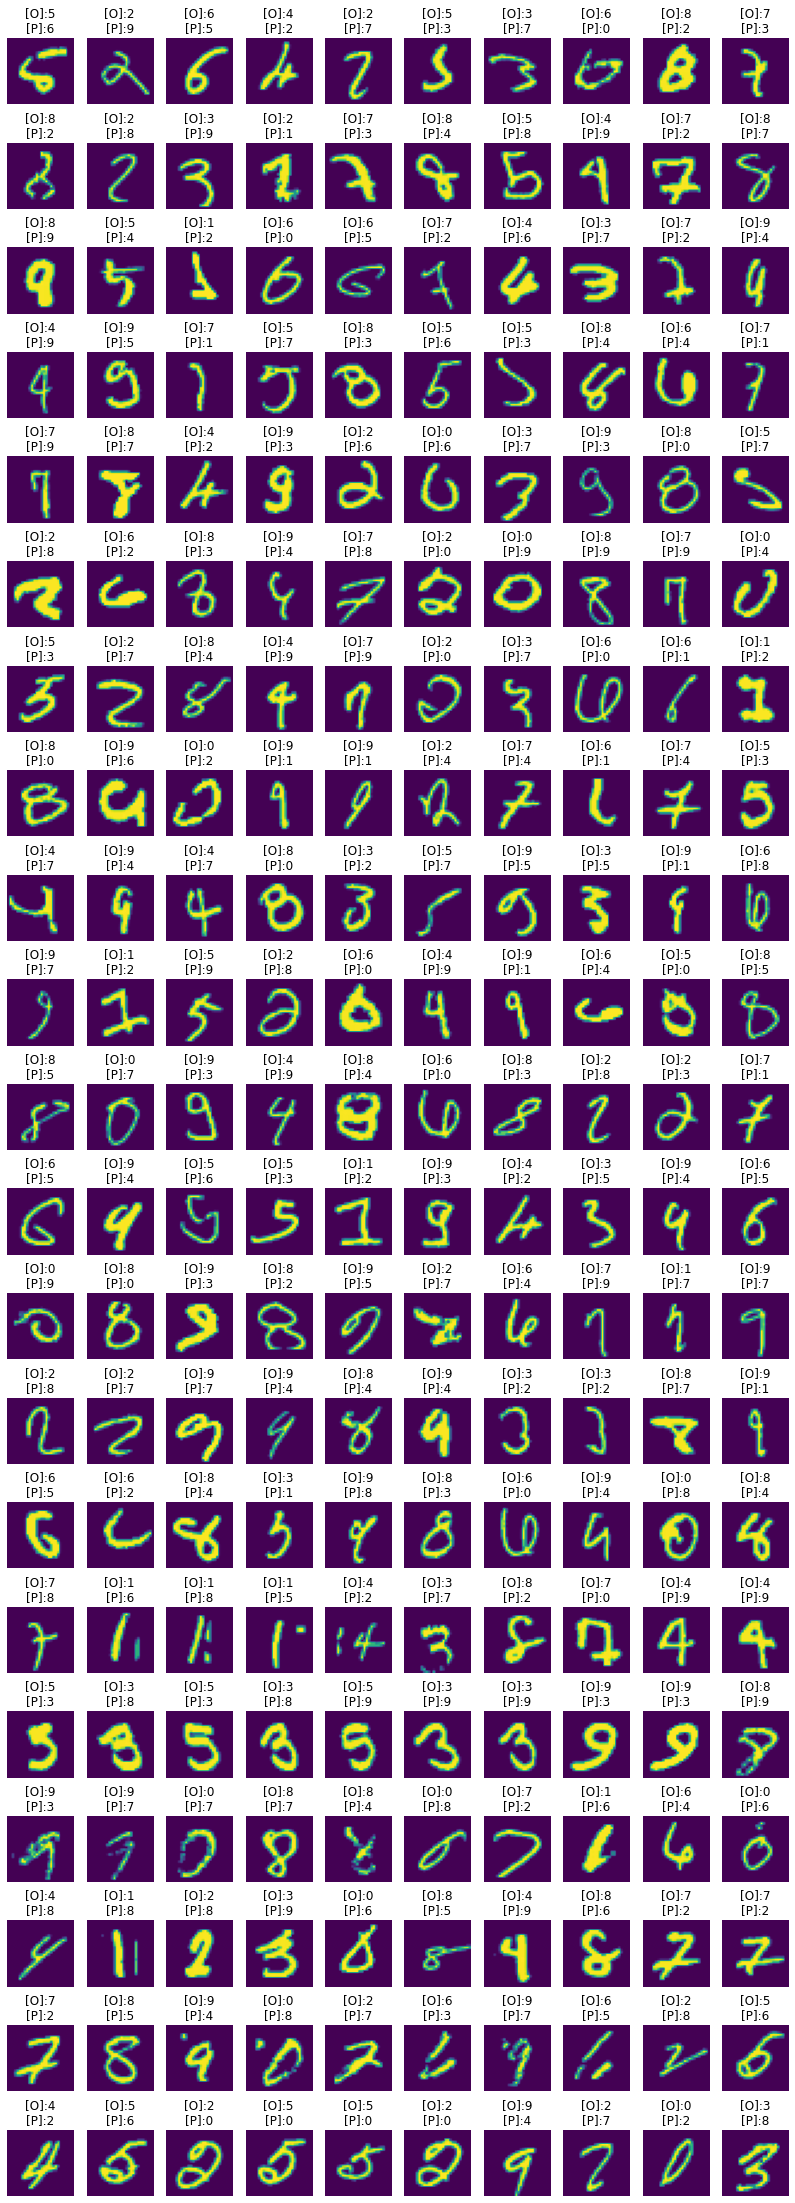

In [ ]:
# 劃出錯誤的圖形
import numpy as np
# nonzero 找出所有不是0 (0=falue 1=true 意思是所有是True的)
# np.nonzero(pre != y_test) #tuple的第一個，所有錯誤的位置
idx = np.nonzero(pre != y_test)[0] #錯誤的地方
# print(len(idx)) #錯誤的數量
false_img = x_test[idx]
false_label = y_test[idx] #原本的標籤
false_pre = pre[idx] #預測的標籤
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    plt.imshow(false_img[i])
    # subplot 不支援中文
    t = "[O]:{}\n[P]:{}".format(false_label[i], false_pre[i])
    plt.title(t)
    plt.axis("off")  # plt.axis 把軸上的標示全部去掉

In [ ]:
# # Pillow
# from PIL import Image
# # RGB, RGBA, L(gray)
# fn = input("輸入檔名:")
# img = Image.open(fn).resize((28, 28)).convert("L")
# img_np = np.array(img)
# img_np_r = img_np.reshape(1, 784) / 255.0
# proba = model.predict(img_np_r)[0]
# for i in range(10):
#     print(i, "的機率:", proba[i])
# ans = model.predict_classes(img_np_r)[0]
# print("答案:", ans)
# plt.imshow(img_np)

KeyboardInterrupt: ignored